In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Page View Time Series Visualizer

# For this project I will visualize time series data using a line chart, bar chart, and box plots. I will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [16]:
#Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',index_col='date', parse_dates=[0])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [14]:
type(df.value)

pandas.core.series.Series

In [18]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [22]:
print(df.index)

DatetimeIndex(['2016-05-19', '2016-05-26', '2016-05-27', '2016-05-28',
               '2016-05-29', '2016-06-07', '2016-06-08', '2016-06-09',
               '2016-06-14', '2016-06-15',
               ...
               '2019-11-16', '2019-11-17', '2019-11-20', '2019-11-21',
               '2019-11-23', '2019-11-24', '2019-11-29', '2019-11-30',
               '2019-12-01', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1238, freq=None)


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

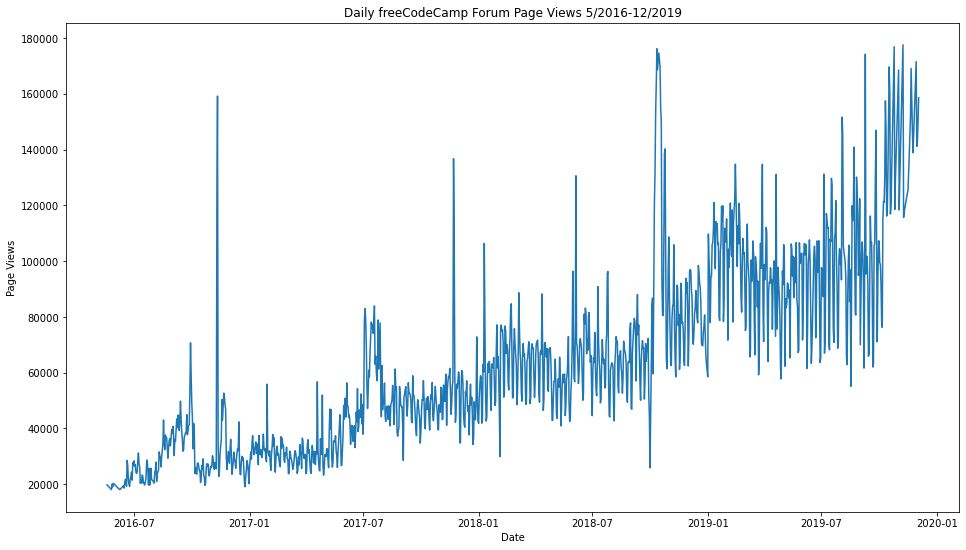

In [28]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
#The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
# Draw line plot

fig, ax = plt.subplots(figsize=(16, 9))

ax = sns.lineplot(data=df, x="date", y="value")

ax.set(
        xlabel="Date",
        ylabel="Page Views",
    )

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

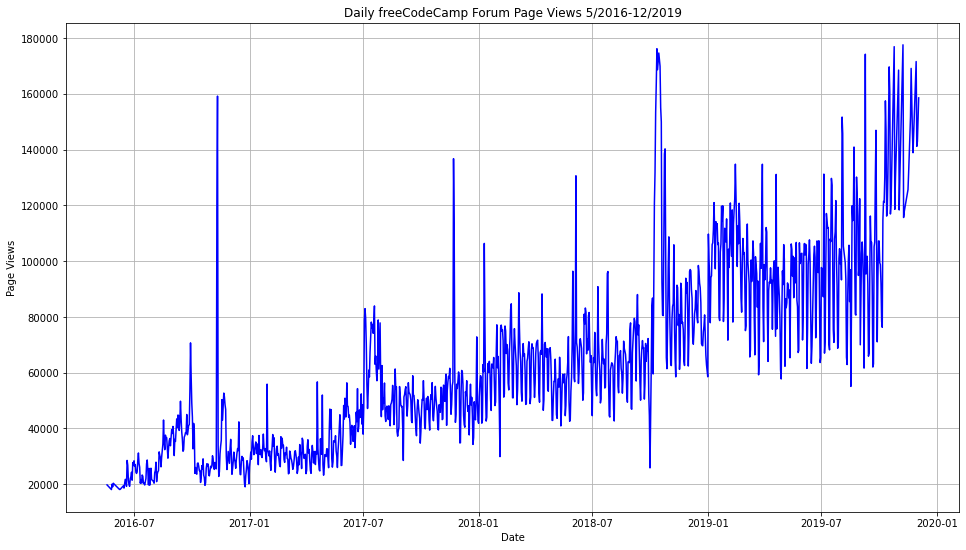

In [37]:
#plt.plot(df.index, df['value'], color='blue', marker='o')
plt.figure(figsize=(16,9))
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Page Views', fontsize=10)
plt.grid(True)
plt.plot(df.index, df['value'], color='blue')
plt.show()

In [44]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
#It should show average daily page views for each month grouped by year. 
#The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be 
#Years and the label on the y axis should be Average Page Views.
# Copy and modify data for monthly bar plot
df_temp = pd.read_csv('fcc-forum-pageviews.csv')
df_temp['Year'] = pd.DatetimeIndex(df_temp['date']).year
df_temp['Month'] = pd.DatetimeIndex(df_temp['date']).month
df_temp


,date,value,Year,Month
0,2016-05-09,1201,2016,5
1,2016-05-10,2329,2016,5
2,2016-05-11,1716,2016,5
3,2016-05-12,10539,2016,5
4,2016-05-13,6933,2016,5
...,...,...,...,...
1299,2019-11-29,171584,2019,11
1300,2019-11-30,141161,2019,11
1301,2019-12-01,142918,2019,12
1302,2019-12-02,220144,2019,12


In [51]:
#df_temp = pd.read_csv('fcc-forum-pageviews.csv')
#df_temp['Year'] = pd.DatetimeIndex(df_temp['date']).year
#df_temp['Month'] = pd.DatetimeIndex(df_temp['date']).month # not used



[Text(0, 0, '2016'),
 Text(1, 0, '2017'),
 Text(2, 0, '2018'),
 Text(3, 0, '2019')]

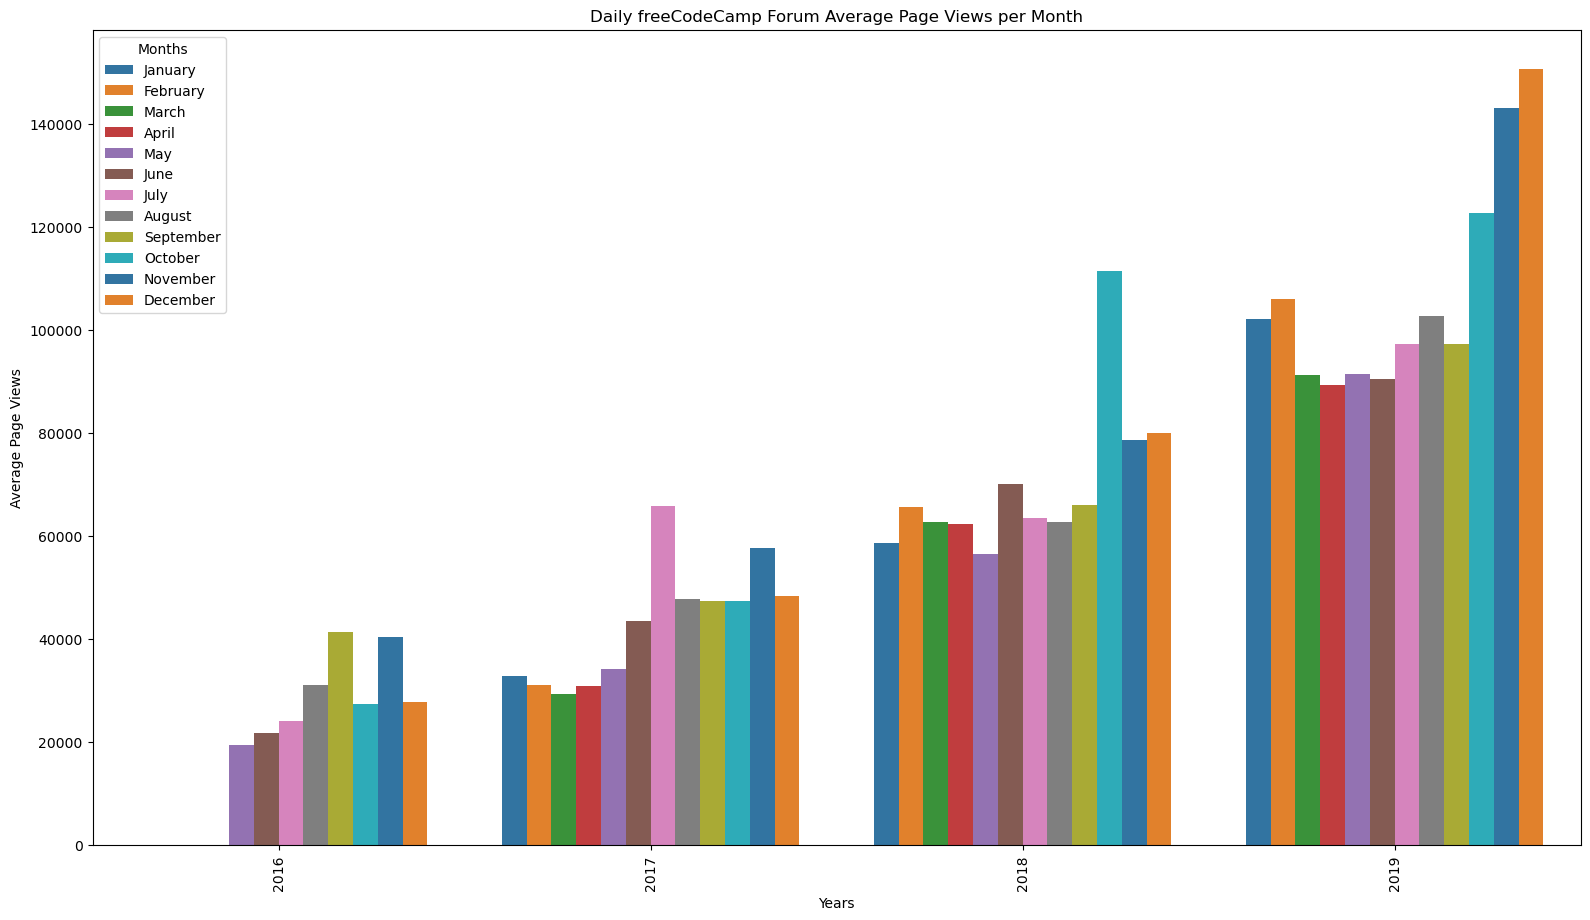

In [52]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
#It should show average daily page views for each month grouped by year. 
#The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be 
#Years and the label on the y axis should be Average Page Views.
# Copy and modify data for monthly bar plot

df_bar = df.copy()
df_bar["Years"] = df_bar.index.year
df_bar["Months"] = df_bar.index.month_name()
df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
df_bar = df_bar.rename(columns={"value": "Average Page Views"})
df_bar = df_bar.reset_index()
missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

    # Draw bar plot
fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')


In [54]:
#Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
#These box plots should show how the values are distributed within a given year or month and how it compares over time.
#The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box


,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0, 0.5, 'Page Views')

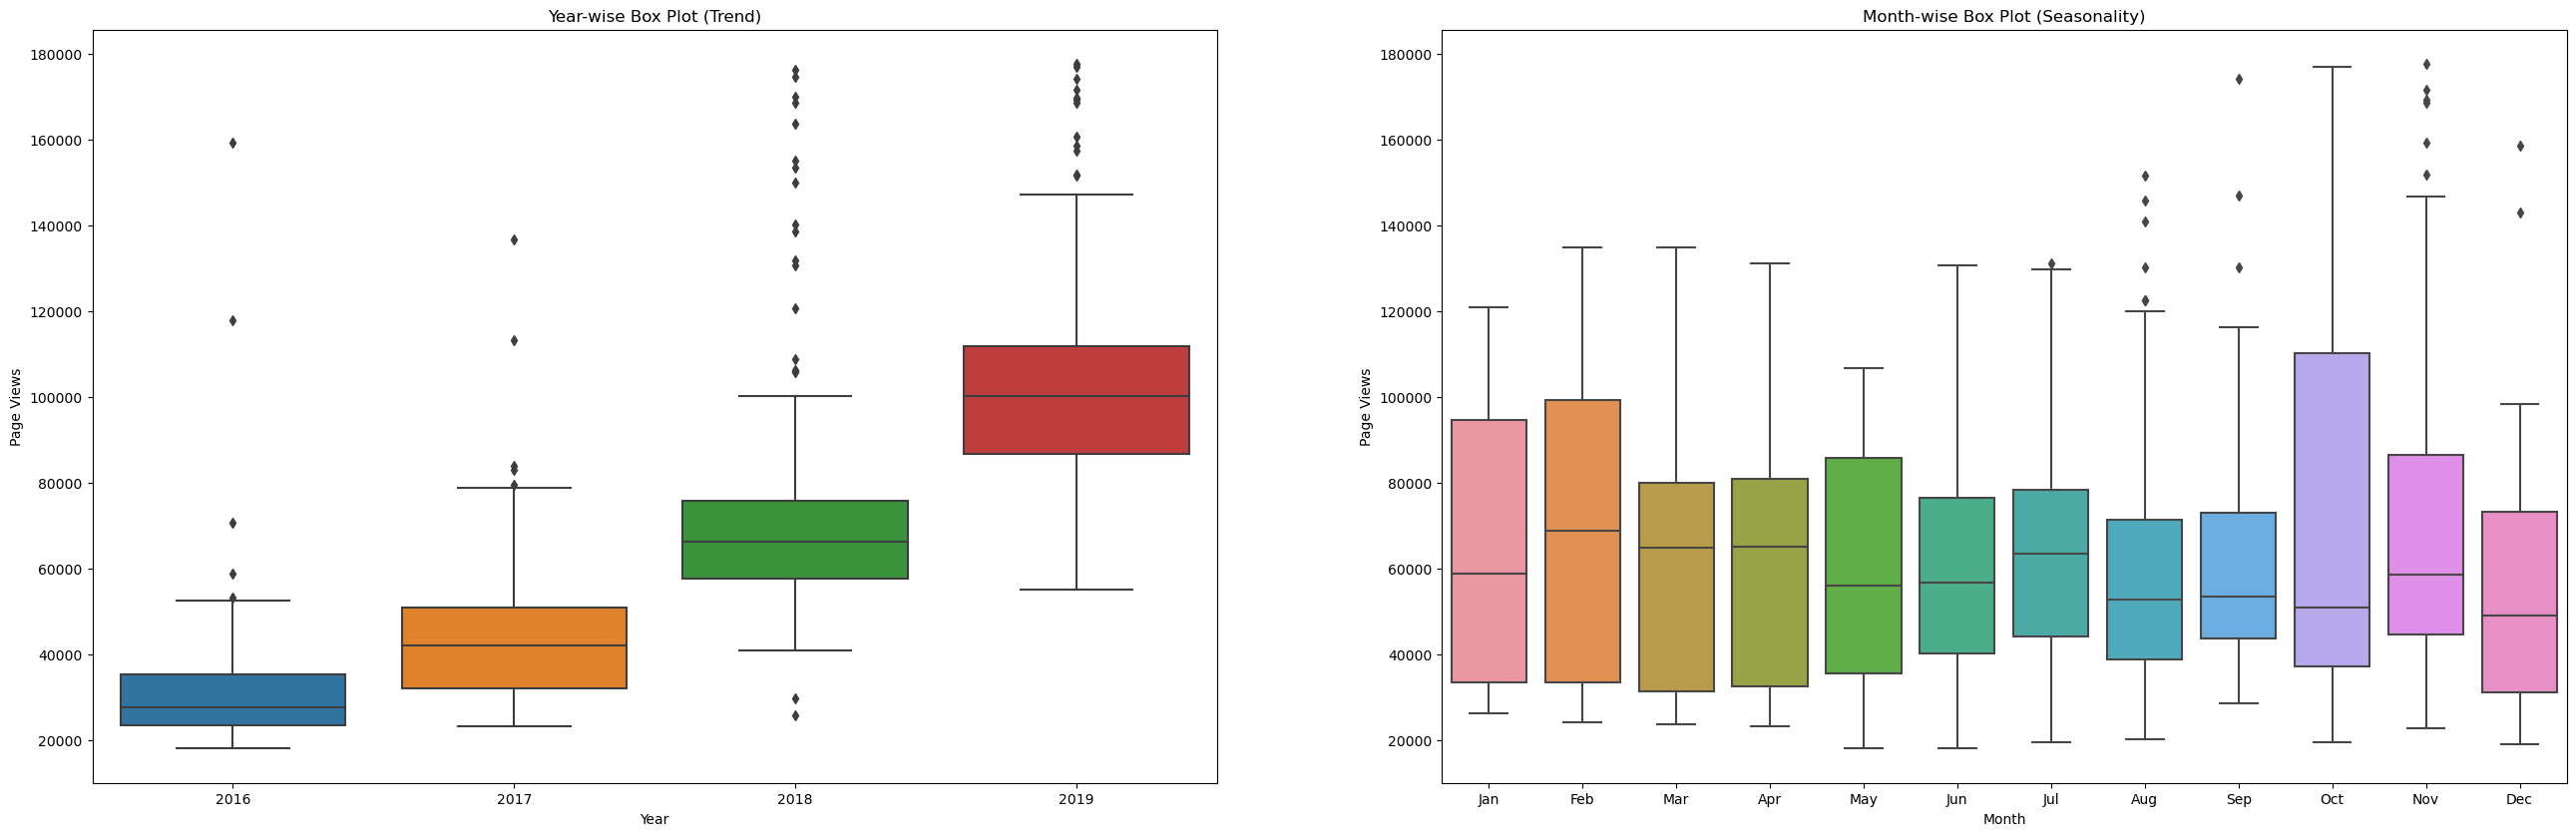

In [57]:
# Draw box plots (using Seaborn)
fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)
    
# Yearly boxplot
sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
    
# Monthly boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")